In [1]:
import numpy as np
import pandas as pd


In [2]:
encodings = ['utf-8','latin1','IS0-8859-1','cp12520']

file_path='spam.csv'

for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f'File succesfully read with encoding: {encoding}')
        break
    except UnicodeDecodeError:
        print(f'Failed to read with encoding: {encoding}')
        continue
        
if 'df' in locals():
    print("CSV file has been succesfully loaded")
else:
    print("all encoding attempts failed. Unable to read the CSV file.")
    


Failed to read with encoding: utf-8
File succesfully read with encoding: latin1
CSV file has been succesfully loaded


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
81,ham,K. Did you call me just now ah?,NaN,NaN,NaN
881,ham,"see, i knew giving you a break a few times wou...",NaN,NaN,NaN
456,ham,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN...",NaN,NaN,NaN
3711,ham,Wat u doing there?,NaN,NaN,NaN
4946,spam,Great News! Call FREEFONE 08006344447 to claim...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4492,ham,"LOL .. *grins* .. I'm not babe, but thanks for..."
3115,ham,Uncle Abbey! Happy New Year. Abiola
1794,ham,How much i gave to you. Morning.
4739,ham,"I keep seeing weird shit and bein all \woah\"" ..."
951,ham,Shb b ok lor... Thanx...


In [8]:
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
df.sample(5)

,Target,Text
2015,ham,Just re read it and I have no shame but tell m...
1158,ham,Hey! There's veggie pizza... :/
4165,ham,Well if I'm that desperate I'll just call arma...
5400,ham,HARD BUT TRUE: How much you show &amp; expres...
5084,ham,Hey happy birthday...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['Target']=encoder.fit_transform(df['Target'])

In [11]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# EDA

In [17]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

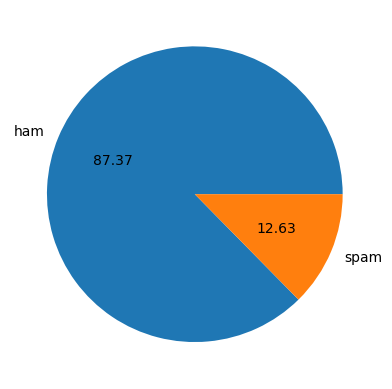

In [19]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Debasmita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df["Text"].apply(len)

In [24]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df["num_sentences"]=df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

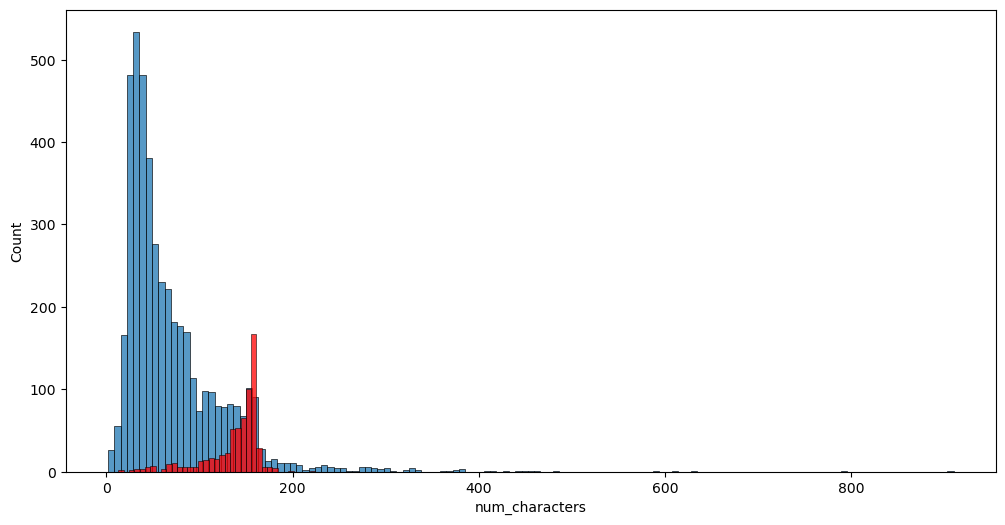

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"]==0]["num_characters"])
sns.histplot(df[df["Target"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

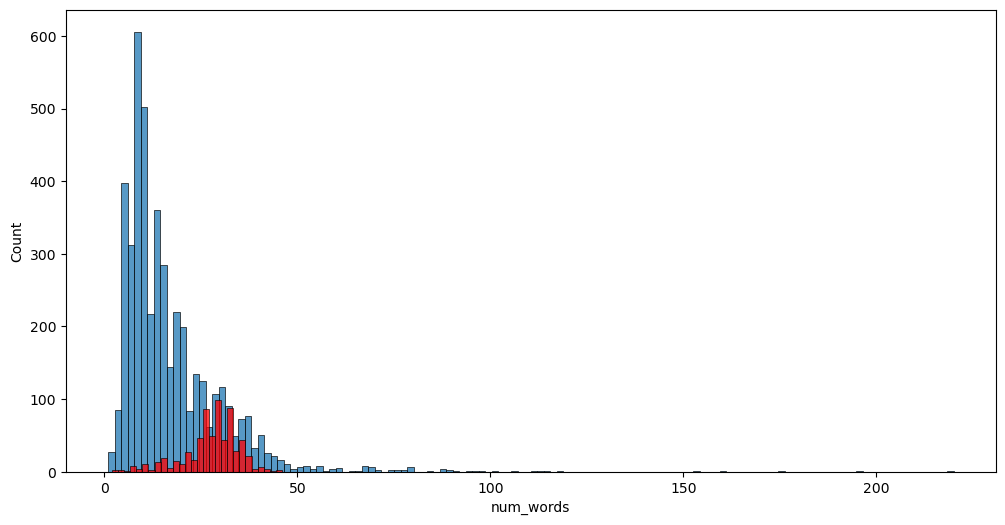

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"]==0]["num_words"])
sns.histplot(df[df["Target"]==1]["num_words"],color="red")


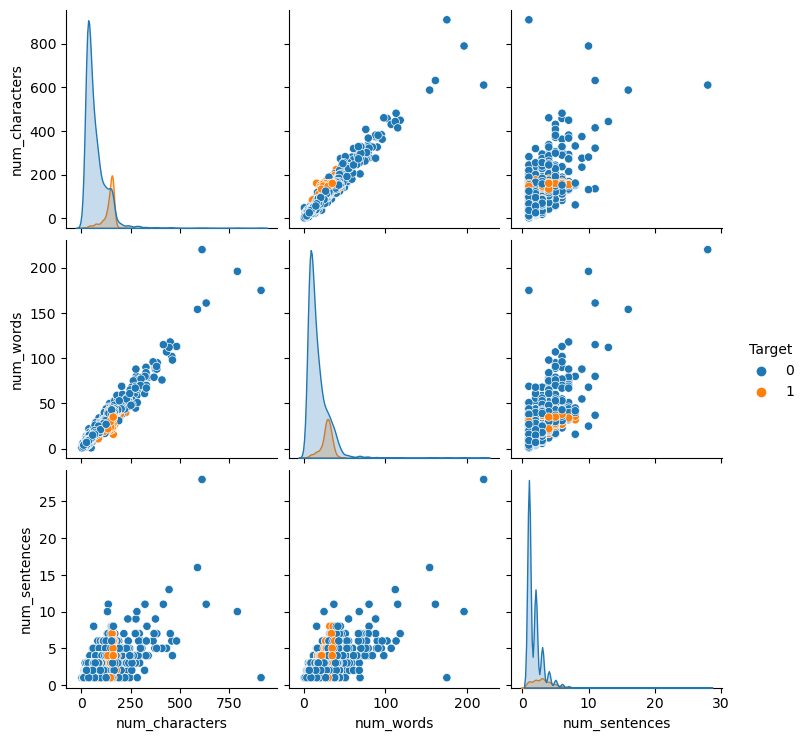

In [34]:
sns.pairplot(df,hue="Target")

C:\Users\Debasmita\AppData\Local\Temp\ipykernel_21056\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

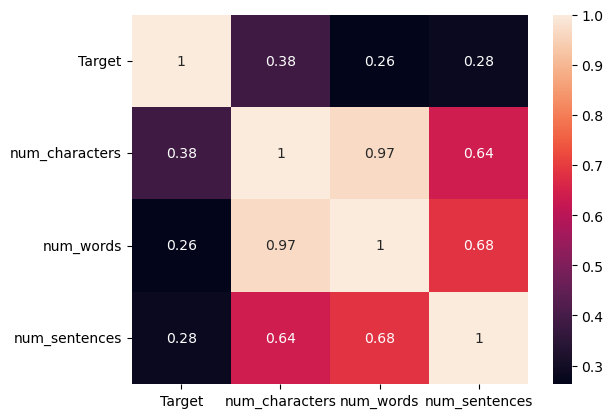

In [35]:
sns.heatmap(df.corr(),annot=True)

# DATA PREPROCESSING

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download("stopwords")

ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    Text=y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
            
    Text=y[:]
    y.clear()
    
    
    for i in Text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)   

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Debasmita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [38]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("walking")

'walk'

In [39]:
df["transformed_text"]=df["Text"].apply(transform_text)

In [40]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud

wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [43]:
spam_wc = wc.generate(df[df["Target"]==1]["transformed_text"].str.cat(sep=" "))

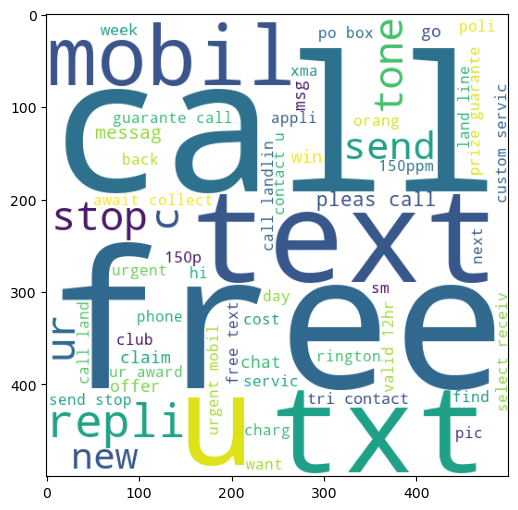

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
spam_wc = wc.generate(df[df["Target"]==0]["transformed_text"].str.cat(sep=" "))

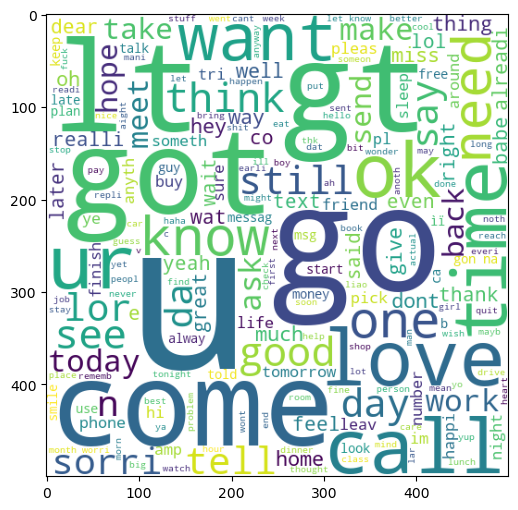

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus=[]
for msg in df[df["Target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

# Building Data Model

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [51]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [52]:
X.shape

(5169, 3000)

In [53]:
y=df['Target'].values

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
mnb=MultinomialNB()
bnb=BernoulliNB()

In [58]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [59]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3
                     ))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [60]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [62]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [70]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier

In [64]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [65]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
precision 0.9917355371900827


In [72]:
estimators=[('svm',svc),("nb",mnb),("et",etc)]
final_estimator = RandomForestClassifier()

In [75]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [78]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train=["Sample text 1","Sample text 2","Sample text 3"]
y_train=[0,1,0]


tfidf=TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf=tfidf.fit_transform(X_train)

mnb=MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

with open("vectorizer.pkl","wb") as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
    
    
with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)